<a href="https://colab.research.google.com/github/Aravind2244/DAUP_PROJECT/blob/main/DAUP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import ttest_ind, f_oneway, zscore

# Load dataset
df = pd.read_csv("/content/diabetes.csv")

# Display dataset info
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183 

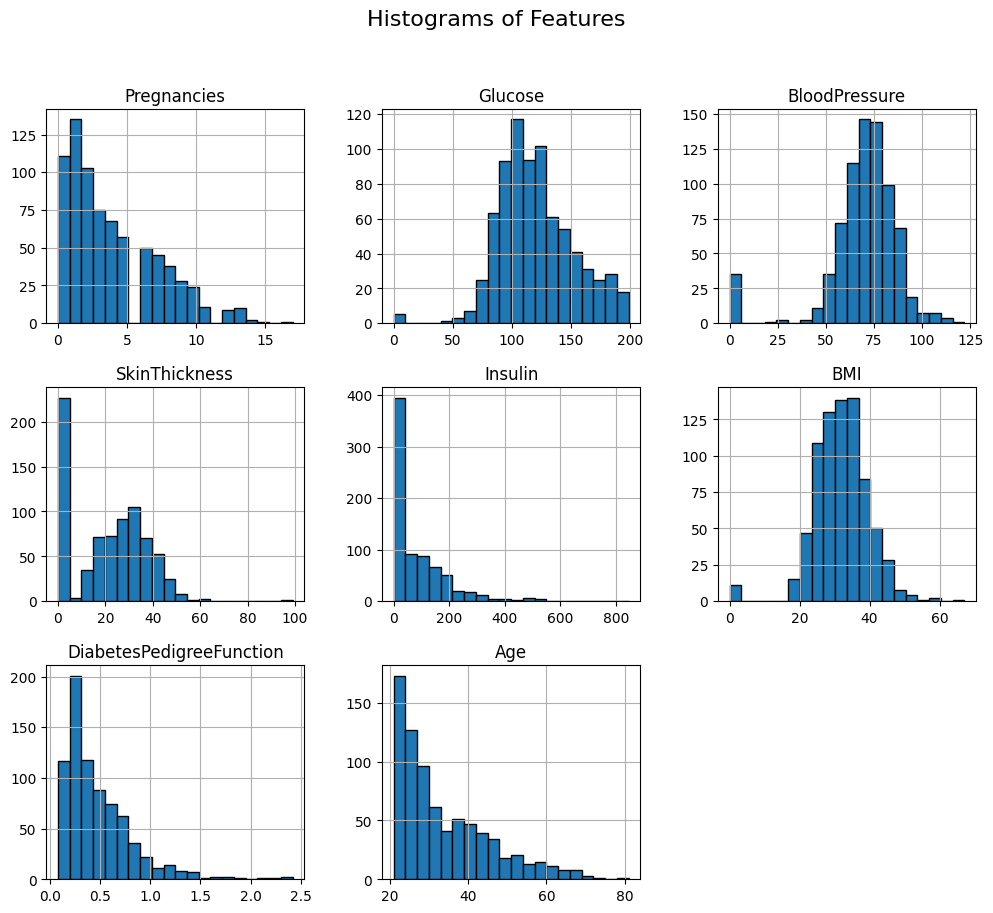

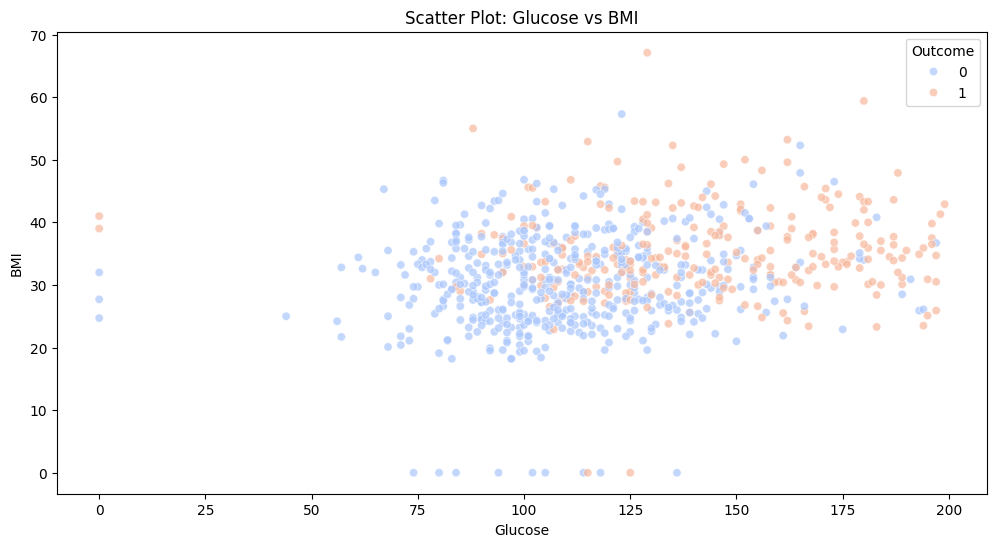

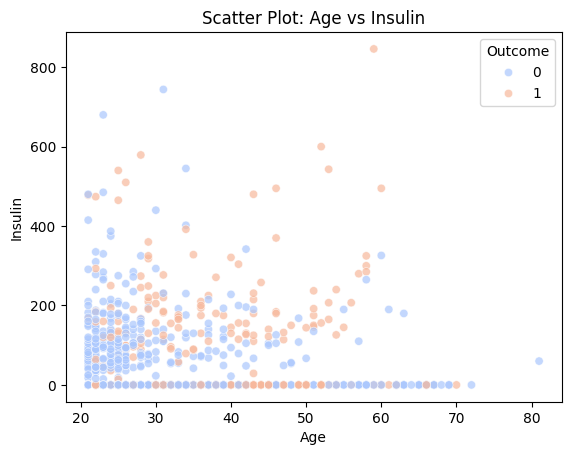

In [ ]:
# Histograms
df.drop(columns=["Outcome"]).hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()

# Scatter plots
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["Glucose"], y=df["BMI"], hue=df["Outcome"], palette="coolwarm", alpha=0.7)
plt.title("Scatter Plot: Glucose vs BMI")
plt.show()

sns.scatterplot(x=df["Age"], y=df["Insulin"], hue=df["Outcome"], palette="coolwarm", alpha=0.7)
plt.title("Scatter Plot: Age vs Insulin")
plt.show()

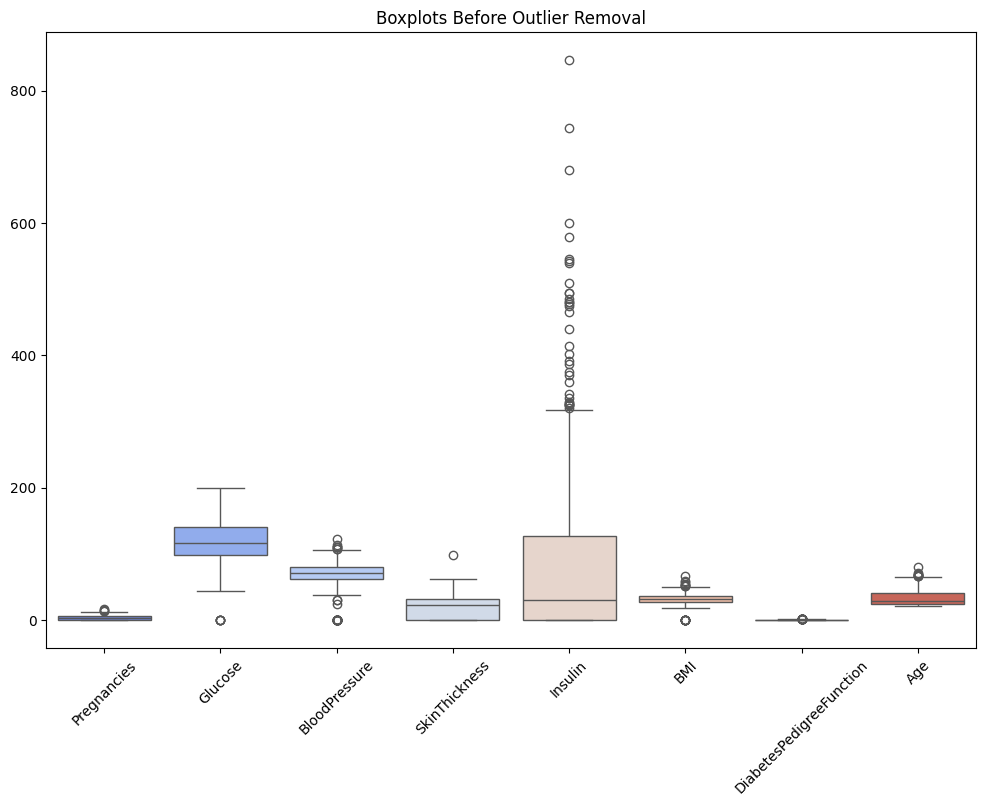

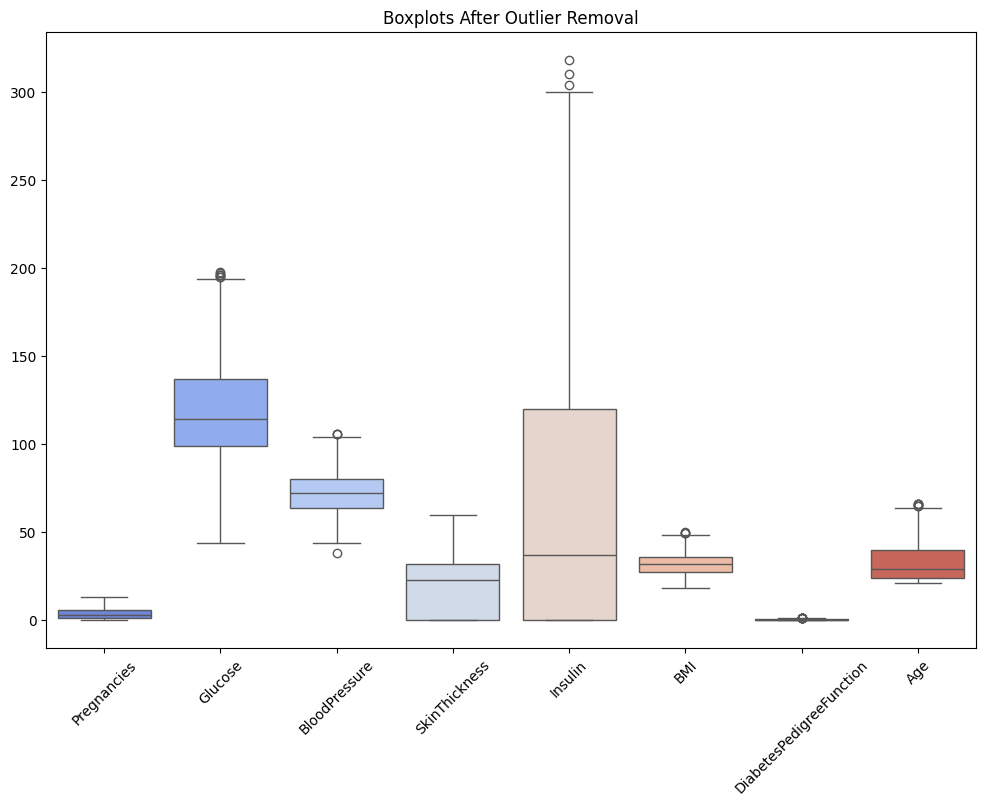

In [ ]:
# Boxplots before outlier removal
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=["Outcome"]), palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Boxplots Before Outlier Removal")
plt.show()

# Outlier Removal using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Boxplots after outlier removal
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned.drop(columns=["Outcome"]), palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Boxplots After Outlier Removal")
plt.show()

In [ ]:
# Identify Outliers using IQR
Q1 = df.iloc[:, :-1].quantile(0.25)
Q3 = df.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[((df.iloc[:, :-1] < lower_bound) | (df.iloc[:, :-1] > upper_bound)).any(axis=1)]
print("Outliers:\n", outliers)


Outliers:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
12            10      139             80              0        0  27.1   
..           ...      ...            ...            ...      ...   ...   
706           10      115              0              0        0   0.0   
707            2      127             46             21      335  34.4   
710            3      158             64             13      387  31.2   
715            7      187             50             33      392  33.9   
753            0      181             88             44      510  43.3   

     DiabetesPedigreeFunction  Age  Outcome  
4                       2.288   33        1  
7       

In [ ]:
# Skewness and Kurtosis
print("Skewness:\n", df_cleaned.drop(columns=["Outcome"]).skew())
print("Kurtosis:\n", df_cleaned.drop(columns=["Outcome"]).kurtosis())

Skewness:
 Pregnancies                 0.829074
Glucose                     0.603106
BloodPressure               0.104619
SkinThickness              -0.070649
Insulin                     1.008737
BMI                         0.290456
DiabetesPedigreeFunction    0.969029
Age                         1.032472
dtype: float64
Kurtosis:
 Pregnancies                -0.133734
Glucose                    -0.046974
BloodPressure              -0.061927
SkinThickness              -1.158328
Insulin                     0.071057
BMI                        -0.278571
DiabetesPedigreeFunction    0.287449
Age                         0.264727
dtype: float64


In [ ]:
# Train-test split
X = df_cleaned.drop(columns=["Outcome"])
y = df_cleaned["Outcome"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel="linear", probability=True)
}

In [ ]:
# Train and evaluate models
metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)

                        Accuracy  Precision    Recall  F1 Score
Logistic Regression     0.828125   0.818182  0.500000  0.620690
Random Forest           0.796875   0.678571  0.527778  0.593750
Support Vector Machine  0.812500   0.772727  0.472222  0.586207


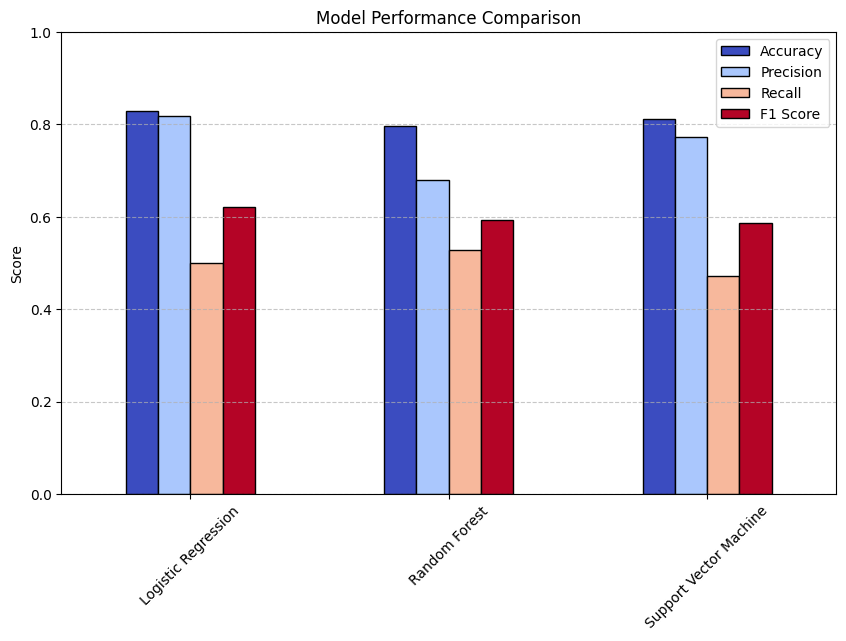

In [ ]:
# Model performance comparison graph
metrics_df.plot(kind="bar", figsize=(10, 6), colormap="coolwarm", edgecolor="black")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(loc="best")
plt.show()

In [ ]:
# Z-test (Glucose levels between diabetic and non-diabetic groups)
from statsmodels.stats.weightstats import ztest
z_stat, z_pval = ztest(df_cleaned[df_cleaned["Outcome"] == 0]["Glucose"],
                       df_cleaned[df_cleaned["Outcome"] == 1]["Glucose"])
print("Z-test: Z-statistic:", z_stat, "P-value:", z_pval)

Z-test: Z-statistic: -14.291578380463282 P-value: 2.4694827881706837e-46


In [ ]:
# T-test (BMI levels)
t_stat, t_pval = ttest_ind(df_cleaned[df_cleaned["Outcome"] == 0]["BMI"],
                           df_cleaned[df_cleaned["Outcome"] == 1]["BMI"], equal_var=False)
print("T-test: T-statistic:", t_stat, "P-value:", t_pval)

T-test: T-statistic: -7.318973283180112 P-value: 1.2757167202486443e-12


In [ ]:
# ANOVA test (Glucose, BMI, Age)
anova_stat, anova_pval = f_oneway(df_cleaned["Glucose"], df_cleaned["BMI"], df_cleaned["Age"])
print("ANOVA test: F-statistic:", anova_stat, "P-value:", anova_pval)

ANOVA test: F-statistic: 4740.069820037442 P-value: 0.0


Found 2928 images belonging to 1 classes.
Found 732 images belonging to 1 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 241ms/step - accuracy: 0.9055 - loss: 0.0738 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step - accuracy: 1.0000 - loss: 1.3051e-39 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 1.0000 - loss: 8.4828e-40 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step - accuracy: 1.0000 - loss: 9.2085e-40 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 153ms/step - accuracy: 1.0000 - loss: 4.2491e-40 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step - accuracy: 1.0000 - loss: 4.9835e-39 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 153ms/step - accuracy: 1.0000 - loss: 9.6423e-40 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


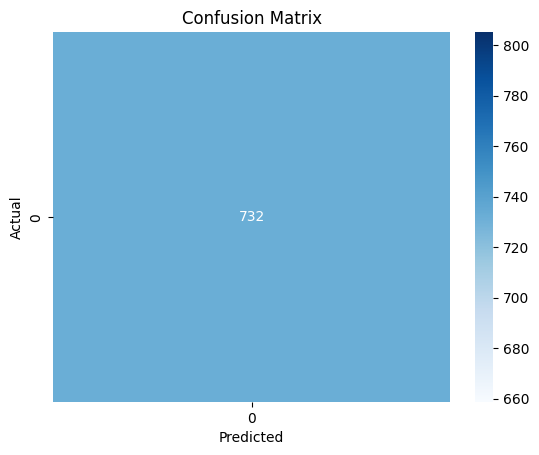

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       732

    accuracy                           1.00       732
   macro avg       1.00      1.00      1.00       732
weighted avg       1.00      1.00      1.00       732



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


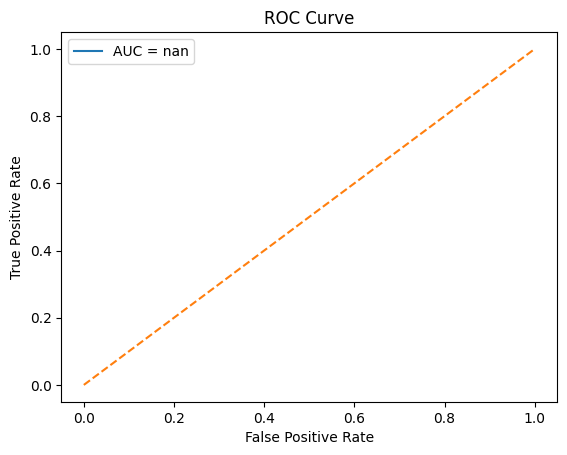

Z-test: Z-statistic: nan P-value: nan
T-test: T-statistic: nan P-value: nan
ANOVA test: F-statistic: nan P-value: nan


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/weightstats.py:748: RuntimeWarning: invalid value encountered in scalar divide
  zstat = (value1 - value2 - diff) / std_diff
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
import zipfile
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from scipy.stats import ttest_ind, f_oneway
from statsmodels.stats.weightstats import ztest

# Extract Dataset
zip_path = "/content/archive (5).zip"
# Changed extract_path to a relative path that exists, or create this directory.
extract_path = "/content/diabetes_images"

# Ensure the zip file exists and is readable
if os.path.exists(zip_path) and zipfile.is_zipfile(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
else:
    print(f"Error: {zip_path} is not a valid zip file or does not exist.")
    # Handle the error appropriately, e.g., exit the script or download the file

# ... (rest of your code) ...

# Define Image Parameters
img_size = (128, 128)
batch_size = 64

data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = data_gen.flow_from_directory(
    extract_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    extract_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Build CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Evaluate Model
y_true = val_data.classes
y_pred = model.predict(val_data) > 0.5

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Statistical Tests
# Convert predictions to numerical values
y_pred_numeric = np.array([1 if pred else 0 for pred in y_pred])

# Z-test
z_stat, z_pval = ztest(y_true, y_pred_numeric)
print("Z-test:", "Z-statistic:", z_stat, "P-value:", z_pval)

# T-test
t_stat, t_pval = ttest_ind(y_true, y_pred_numeric, equal_var=False)
print("T-test:", "T-statistic:", t_stat, "P-value:", t_pval)

# ANOVA test
anova_stat, anova_pval = f_oneway(y_true, y_pred_numeric)
print("ANOVA test:", "F-statistic:", anova_stat, "P-value:", anova_pval)


In [ ]:
!pip uninstall -y numpy
!pip uninstall -y gensim
!pip install numpy==1.23.5
!pip install gensim==4.3.1
!pip install --upgrade tensorflow pandas scikit-learn

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.23.5

  Using cached gensim-4.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.4 kB)
Using cached gensim-4.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.3/644.9 MB 167.5 MB/s eta 0:00:03ERROR: Operation cancelled by user
^C


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
!pip install --upgrade numpy gensim tensorflow pandas scikit-learn
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from gensim.models import Word2Vec
!pip install gensim --upgrade


# Load sample Rotten Tomatoes reviews (you can use any other .csv with 'review' and 'sentiment' columns)
df = pd.read_csv("/content/data_rt.csv")

# Check the actual column names in the dataframe
print(df.columns)

texts = df['reviews'].astype(str).tolist()  # Changed 'text' to 'reviews'
labels = df['labels'].map({'positive': 1, 'negative': 0}).tolist()  # Changed 'sentiment' to 'labels'
# Tokenize sentences for Word2Vec (splitting words)
sentences = [text.split() for text in texts]

# Train Word2Vec model
embedding_dim = 100
w2v_model = Word2Vec(sentences, vector_size=embedding_dim, window=5, min_count=1, workers=4, sg=1)

# Prepare tokenizer for Keras
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

# Pad sequences
max_len = 100
X = pad_sequences(sequences, maxlen=max_len)
y = np.array(labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
    else:
        embedding_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim, ))

# Build LSTM model using Word2Vec embeddings
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=False))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Index(['reviews', 'labels'], dtype='object')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     1,949,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,949,900 (7.44 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,949,900 (7.44 MB)

Epoch 1/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 57s 374ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 40s 296ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 41s 298ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 42s 309ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 40s 298ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
